<h1> KNN 알고리즘 사용</h1>
 
KNN은 새로운 데이터가 주어졌을 때 기존 데이터 가운데 가장 가까운 𝑘개 이웃의 정보로 새로운 데이터를 예측하는 방법론입니다. 아래 그림처럼 검은색 점의 범주 정보는 주변 이웃들을 가지고 추론해낼 수 있습니다. 만약 𝑘가 1이라면 오렌지색, 𝑘가 3이라면 녹색으로 분류(classification)하는 것입니다.

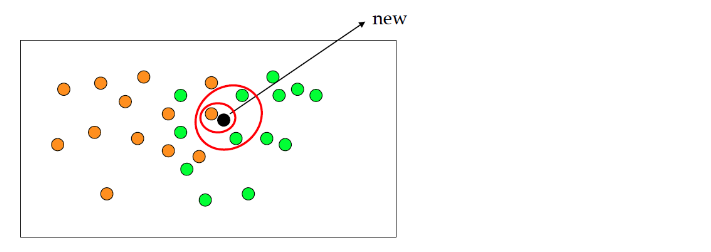

<h1> sklearn KNeighborsClassifier 

Max train score 98.6060419506618 % and k = [1]
Max test score 95.53249494327676 % and k = [5]


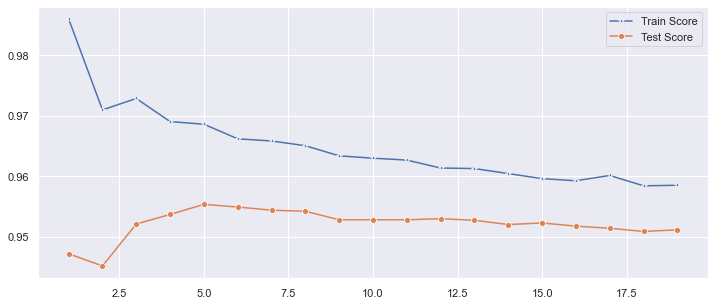

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings('ignore')
#data = pd.read_csv('data_set.csv')
data = pd.read_csv('data_set_final.csv')

sc_X = StandardScaler()
'''
1. Standard Scaler

⚫ 기존 변수의 범위를 정규 분포로 변환하는 것.

⚫ 데이터의 최소 최대를 모를 때 사용

⚫ 모든 피처의 평균을 0, 분산을 1로 만듬

⚫ 이상치가 있다면 평균과 표준편차에 영향을 미치기 때문에 데이터의 확산이 달라지게 됨

     ➡️ 이상치가 많다면 사용하지 않는 것이 좋음 
'''

#X =  pd.DataFrame(sc_X.fit_transform(data.drop(["direction"],axis = 1),), columns=['x','y','z','angle','tight'])
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["direction"],axis = 1),), columns=['x','y','z'])
y = data.direction
'''
x축 가속도 값, y축 가속도 값, z축 가속도 값을 train 데이터로 사용

'''

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)
'''
데이터의 3분의 1을 test데이터로 사용
'''

test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    '''
    i는 판단할 가장 가까운 이웃 점의 개수입니다. 
    성능이 가장 좋은 best i는 데이터마다 다르기 때문에 탐욕적인 방식으로 찾아야 하므로 점 1개부터 20개까지
    for문을 돌려 제일 좋은 성능을 보여주는 점의 개수를 찾습니다.
    '''
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [3]:
knn = KNeighborsClassifier(5)
'''
위의 그래프를 보면 점이 5개일 때 제일 높은 성능을 보여주는 것을 확인할 수 있습니다.
'''
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9553249494327676

<h1> predict

In [39]:
print(knn.predict(X_test[:10]))

[0 8 2 7 5 7 4 2 5 6]


In [45]:
y_test[:10]

10788    0
32659    8
26034    2
17302    7
12351    5
23787    7
32728    4
12683    2
20367    5
3469     6
Name: direction, dtype: int64

Max train score 99.64821247966228 % and k = [1]
Max test score 98.90071233840472 % and k = [6]
[0 8 2 7 5 7 4 2 5 6]


10788    0
32659    8
26034    2
17302    7
12351    5
23787    7
32728    4
12683    2
20367    5
3469     6
Name: direction, dtype: int64

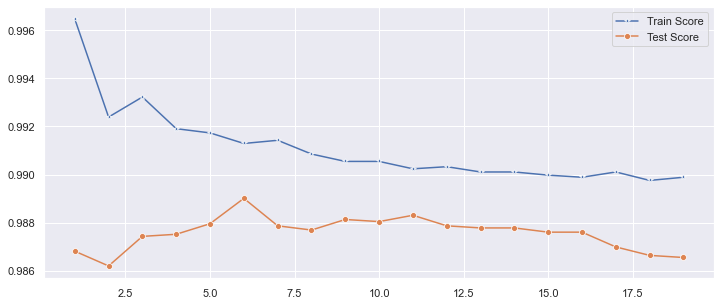

In [49]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('data_set.csv')
#data.drop(["direction"],axis = 1)
#data.head()

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["direction"],axis = 1),), columns=['x','y','z','angle','tight'])
y = data.direction

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

knn = KNeighborsClassifier(6)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

print(knn.predict(X_test[:10]))
y_test[:10]